In [1]:
import numpy as np
import os, shutil
import zipfile
import keras
from tqdm import tqdm
from keras.preprocessing import image
import PIL
import PIL.Image
import matplotlib.pyplot as plt

2024-04-25 20:22:48.557345: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 20:22:48.557411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 20:22:48.709078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 20:22:50.806998: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
# Define the source and destination directories
cat_dataset_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Cat'
dog_dataset_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Dog'
train_cats_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/train/cats'
validation_cats_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/validation/cats'
test_cats_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/test/cats'
train_dogs_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/train/dogs'
validation_dogs_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/validation/dogs'
test_dogs_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/test/dogs'

# Downloading the Dataset

In [2]:
!pip install -q kaggle

In [3]:
 #from google.colab import files
 #files.upload()

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory '/home/studio-lab-user/.kaggle': File exists


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download shaunthesheep/microsoft-catsvsdogs-dataset

microsoft-catsvsdogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# Extracting the zip files

zip_file_path = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/microsoft-catsvsdogs-dataset.zip'

extraction_path = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/'

# Get the total size of the ZIP file
total_size = os.path.getsize(zip_file_path)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Use tqdm to create a progress bar
    with tqdm(total=total_size, desc='Extracting', unit='B', unit_scale=True) as pbar:
        for file_info in zip_ref.infolist():
            zip_ref.extract(file_info, extraction_path)
            pbar.update(file_info.file_size)

Extracting: 866MB [00:12, 69.5MB/s]                            


In [3]:
def check_image_loading(directory):
    # Get the list of filenames in the directory
    filenames = os.listdir(directory)

    # Iterate over the filenames and attempt to load each image
    for filename in filenames:
        full_path = os.path.join(directory, filename)
        try:
            # Attempt to load the image
            img = image.load_img(full_path)
            # Optional: If you want to do something with the loaded image, you can add your code here
        except Exception as e:
            # Print the filename and error message if loading the image fails
            print(f"Error loading image: {full_path}")
            print(f"Error message: {str(e)}")

# Specify the paths to the directories containing cat and dog images
cat_dataset_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Cat'
dog_dataset_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Dog'

# Check image loading for cat images
print("Checking cat images:")
check_image_loading(cat_dataset_dir)

# Check image loading for dog images
print("Checking dog images:")
check_image_loading(dog_dataset_dir)

Checking cat images:
Error loading image: /home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Cat/666.jpg
Error message: cannot identify image file <_io.BytesIO object at 0x7f1e6bb70040>
Error loading image: /home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Cat/Thumbs.db
Error message: cannot identify image file <_io.BytesIO object at 0x7f1e6b99c360>
Checking dog images:
Error loading image: /home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Dog/11702.jpg
Error message: cannot identify image file <_io.BytesIO object at 0x7f1e6b99c360>


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Error loading image: /home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Dog/Thumbs.db
Error message: cannot identify image file <_io.BytesIO object at 0x7f1e6bb7b9f0>


# Creating a Smaller Dataset Contains 4000 Images

In [4]:
base_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small'
os.mkdir(base_dir)

In [10]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [11]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [12]:
# Define the source and destination directories
cat_dataset_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Cat'
dog_dataset_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/PetImages/Dog'
train_cats_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/train/cats'
validation_cats_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/validation/cats'
test_cats_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/test/cats'
train_dogs_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/train/dogs'
validation_dogs_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/validation/dogs'
test_dogs_dir = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/test/dogs'

def copy_images(src_dir, dst_dir, start_index, end_index):
    # Get the list of filenames in the source directory
    fnames = ['{}.jpg'.format(i) for i in range(start_index, end_index)]

    # Iterate over the filenames and attempt to copy each image
    for fname in fnames:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dst_dir, fname)
        try:
            # Attempt to load the image
            img = image.load_img(src)
            # Copy the image if loading is successful
            shutil.copyfile(src, dst)
        except Exception as e:
            # Print the filename and error message if loading the image fails
            print(f"Error loading image: {src}")
            print(f"Error message: {str(e)}")

# Copy cat images to training, validation, and test directories
copy_images(cat_dataset_dir, train_cats_dir, 0, 1000)
copy_images(cat_dataset_dir, validation_cats_dir, 1000, 1500)
copy_images(cat_dataset_dir, test_cats_dir, 1500, 2000)

# Copy dog images to training, validation, and test directories
copy_images(dog_dataset_dir, train_dogs_dir, 0, 1000)
copy_images(dog_dataset_dir, validation_dogs_dir, 1000, 1500)
copy_images(dog_dataset_dir, test_dogs_dir, 1500, 2000)

Error loading image: /home/studio-lab-user/sagemaker-studiolab-notebooks/PetImages/Cat/666.jpg
Error message: cannot identify image file <_io.BytesIO object at 0x7f5b5bba1450>


In [4]:
# Check the total number of images
print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))
print('total test cat images:',len(os.listdir(test_cats_dir)))
print('total test dog images:',len(os.listdir(test_dogs_dir)))

total training cat images: 999
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Building the Network

In [5]:
from keras import layers
from keras import models
from keras import optimizers

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32,
                        (3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,
                        (3, 3),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128,
                        (3, 3),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128,
                        (3, 3),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics = ['acc'])

# Data Preprocessing

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
# Get the filenames from the generator
filenames = validation_generator.filenames

# Extract file extensions
file_formats = [os.path.splitext(filename)[1] for filename in filenames]

# Count occurrences of each file format
format_counts = {}
for format in file_formats:
    format_counts[format] = format_counts.get(format, 0) + 1

# Print the counts of each file format
print("File Formats in Dataset:")
for format, count in format_counts.items():
    print(f"{format}: {count}")

File Formats in Dataset:
.jpg: 1000


In [13]:
train_path = '/home/studio-lab-user/sagemaker-studiolab-notebooks/Cat_Dog_Image_Classification/cats_and_dogs_small/train'

# Get the filenames from the generator
filenames = train_generator.filenames

# List to store filenames of images that give errors
error_filenames = []

# Iterate over the filenames and attempt to load each image
for filename in filenames:
    full_path = os.path.join(train_path, filename)
    try:
        # Attempt to load the image
        img = image.load_img(full_path)
        # Optional: If you want to do something with the loaded image, you can add your code here
    except Exception as e:
        # Print the filename and error message if loading the image fails
        print(f"Error loading image: {full_path}")
        print(f"Error message: {str(e)}")
        # Store the filename of the problematic image
        error_filenames.append(filename)

In [14]:
# Fitting the Model
history = model.fit(
    train_generator,
    #steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    #validation_steps = 50
)

Epoch 1/30


I0000 00:00:1714076618.534617     168 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 [==============================] - 14s 65ms/step - loss: 0.8459 - acc: 0.5678 - val_loss: 0.6490 - val_acc: 0.6390
Epoch 2/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6693 - acc: 0.5988 - val_loss: 0.6692 - val_acc: 0.5870
Epoch 3/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6548 - acc: 0.6378 - val_loss: 0.6570 - val_acc: 0.5940
Epoch 4/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6213 - acc: 0.6668 - val_loss: 0.6040 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5775 - acc: 0.7154 - val_loss: 0.6006 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 5s 47ms/step - loss: 0.5458 - acc: 0.7399 - val_loss: 0.5771 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5063 - acc: 0.7669 - val_loss: 0.5783 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 5s 47ms/step - loss: 0.48

In [15]:
model.save('cats_and_dogs_small_1.h5')

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


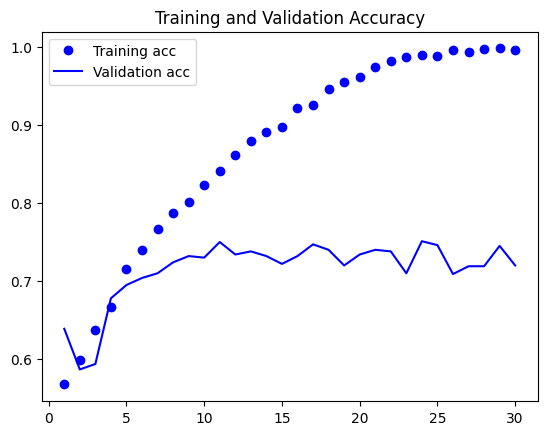

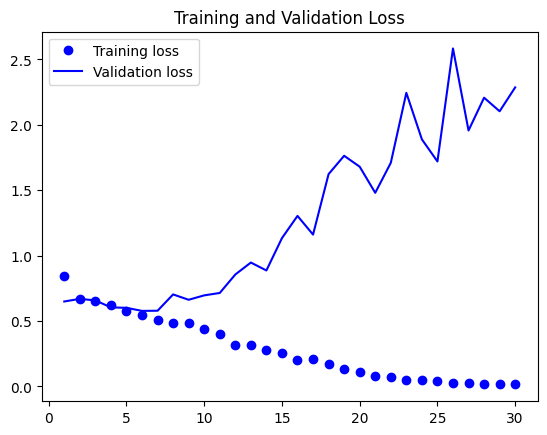

In [16]:
# Display the Loss and Accuracy Curves During Training



acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

As seen in the graphs above, validation loss reaches its minimum after only five epochs and then started to increase. So there is an issue of overfitting.

# Data Augmentation

In [17]:
# Set up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

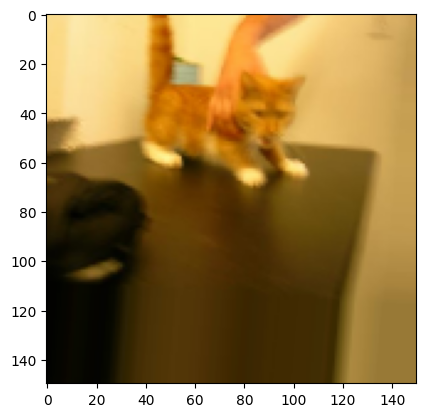

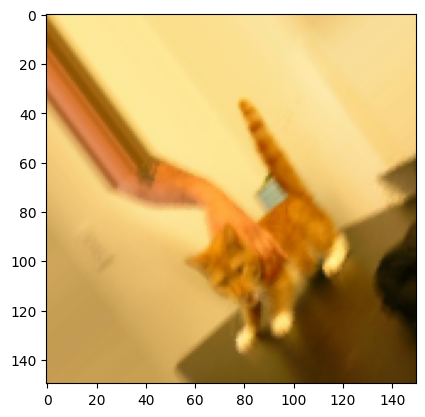

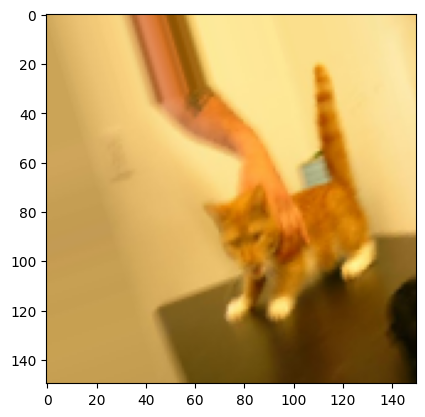

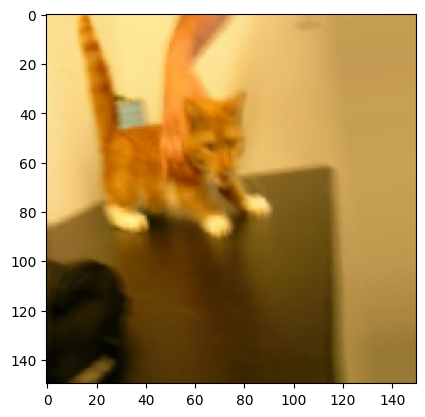

In [18]:
# Display randomly augmented training images

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[0]

img = image.load_img(img_path, target_size = (150,150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size = 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32,
                        (3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,
                        (3, 3),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128,
                        (3, 3),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128,
                        (3, 3),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ='relu'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics = ['acc'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
# Fitting the Model
history = model.fit(
    train_generator,
    #steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    #validation_steps = 50
)

Epoch 1/100
63/63 [==============================] - 16s 220ms/step - loss: 0.8420 - acc: 0.5593 - val_loss: 0.6559 - val_acc: 0.6180
Epoch 2/100
63/63 [==============================] - 14s 215ms/step - loss: 0.7019 - acc: 0.5618 - val_loss: 0.6563 - val_acc: 0.6020
Epoch 3/100
63/63 [==============================] - 13s 214ms/step - loss: 0.6955 - acc: 0.5968 - val_loss: 0.9492 - val_acc: 0.5090
Epoch 4/100
63/63 [==============================] - 13s 214ms/step - loss: 0.6902 - acc: 0.6063 - val_loss: 0.6323 - val_acc: 0.6460
Epoch 5/100
63/63 [==============================] - 13s 213ms/step - loss: 0.6678 - acc: 0.6038 - val_loss: 0.6215 - val_acc: 0.6610
Epoch 6/100
63/63 [==============================] - 14s 227ms/step - loss: 0.6634 - acc: 0.6193 - val_loss: 0.6304 - val_acc: 0.6520
Epoch 7/100
63/63 [==============================] - 15s 234ms/step - loss: 0.6571 - acc: 0.6133 - val_loss: 0.7105 - val_acc: 0.5930
Epoch 8/100
63/63 [==============================] - 14s 214ms

In [22]:
model.save('cats_and_dogs_small_2.h5')

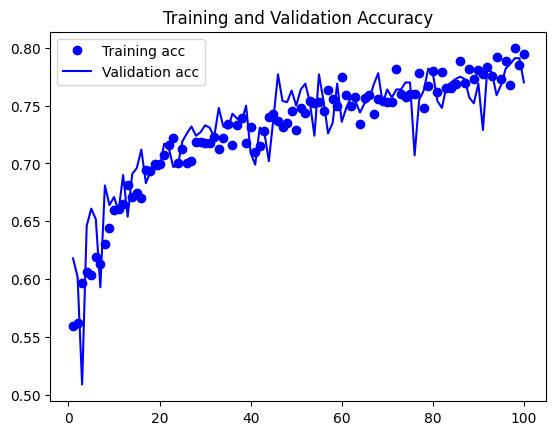

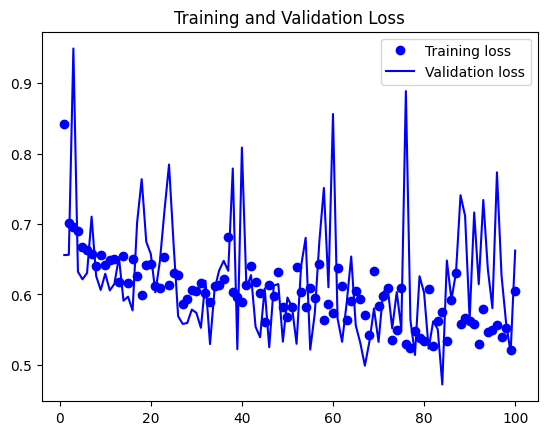

In [23]:
# Display the Loss and Accuracy Curves During Training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Using a Pretrained Network

In [24]:
from keras.applications import VGG16

In [25]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
)

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [26]:
from keras import models
from keras import layers
import tensorflow

In [27]:
# Adding a densenly connected classifier on top of the convolutional base

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Freezing the whole conv base

In [29]:
print("The number of trainable weights before freezing conv base: ", len(model.trainable_weights))
conv_base.trainable = False
print("The number of trainable weights after freezing conv base: ", len(model.trainable_weights))

The number of trainable weights before freezing conv base:  30
The number of trainable weights after freezing conv base:  4


In [30]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics = ['acc'])

In [32]:
history = model.fit_generator(
    train_generator,
    epochs = 30,
    validation_data = validation_generator
)

Epoch 1/30


/tmp/ipykernel_95/3635359240.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 21s 170ms/step - loss: 0.5941 - acc: 0.6918 - val_loss: 0.4669 - val_acc: 0.8310
Epoch 2/30
100/100 [==============================] - 14s 144ms/step - loss: 0.4897 - acc: 0.7784 - val_loss: 0.3871 - val_acc: 0.8510
Epoch 3/30
100/100 [==============================] - 14s 144ms/step - loss: 0.4313 - acc: 0.8124 - val_loss: 0.3450 - val_acc: 0.8630
Epoch 4/30
100/100 [==============================] - 14s 144ms/step - loss: 0.4050 - acc: 0.8284 - val_loss: 0.3162 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 14s 145ms/step - loss: 0.3773 - acc: 0.8399 - val_loss: 0.3002 - val_acc: 0.8780
Epoch 6/30
100/100 [==============================] - 15s 146ms/step - loss: 0.3740 - acc: 0.8374 - val_loss: 0.2956 - val_acc: 0.8740
Epoch 7/30
100/100 [==============================] - 15s 145ms/step - loss: 0.3615 - acc: 0.8449 - val_loss: 0.2869 - val_acc: 0.8710
Epoch 8/30
100/100 [==============================] - 14s 144ms/st

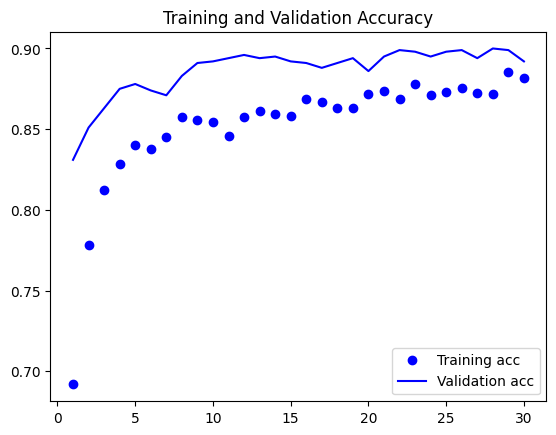

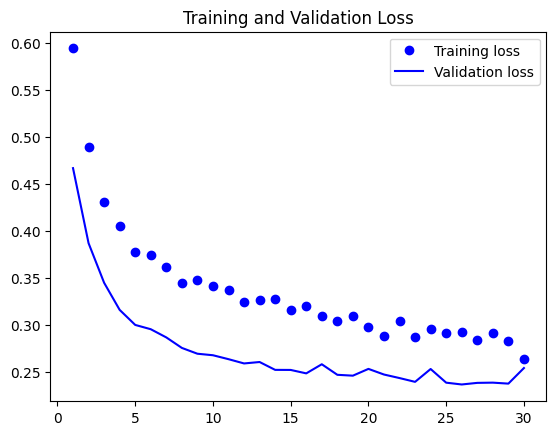

In [33]:
# Display the Loss and Accuracy Curves During Training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Unfreezing last 3 conv layers of conv base

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [35]:
''''
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer_trainable = True
  else:
    layer_trainable = False
'''

'\'\nconv_base.trainable = True\n\nset_trainable = False\nfor layer in conv_base.layers:\n  if layer.name == "block5_conv1":\n    set_trainable = True\n  if set_trainable:\n    layer_trainable = True\n  else:\n    layer_trainable = False\n'

In [36]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [37]:
# Freeze the convolutional base
conv_base.trainable = True

# Freeze all layers except the last 3 convolutional layers
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics = ['acc'])

In [40]:
# Fitting the Model
history = model.fit(
    train_generator,
    #steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator
    #validation_steps = 50
)

Epoch 1/30
100/100 [==============================] - 16s 147ms/step - loss: 0.2970 - acc: 0.8699 - val_loss: 0.2268 - val_acc: 0.9080
Epoch 2/30
100/100 [==============================] - 15s 146ms/step - loss: 0.2651 - acc: 0.8884 - val_loss: 0.2151 - val_acc: 0.9080
Epoch 3/30
100/100 [==============================] - 15s 146ms/step - loss: 0.2417 - acc: 0.8989 - val_loss: 0.2093 - val_acc: 0.9130
Epoch 4/30
100/100 [==============================] - 15s 146ms/step - loss: 0.2272 - acc: 0.9015 - val_loss: 0.2023 - val_acc: 0.9190
Epoch 5/30
100/100 [==============================] - 15s 146ms/step - loss: 0.2034 - acc: 0.9205 - val_loss: 0.1908 - val_acc: 0.9240
Epoch 6/30
100/100 [==============================] - 15s 147ms/step - loss: 0.2014 - acc: 0.9255 - val_loss: 0.1884 - val_acc: 0.9240
Epoch 7/30
100/100 [==============================] - 15s 146ms/step - loss: 0.1998 - acc: 0.9140 - val_loss: 0.1843 - val_acc: 0.9240
Epoch 8/30
100/100 [==============================] - 1

In [41]:
model.save('cats_and_dogs_small_3.h5')

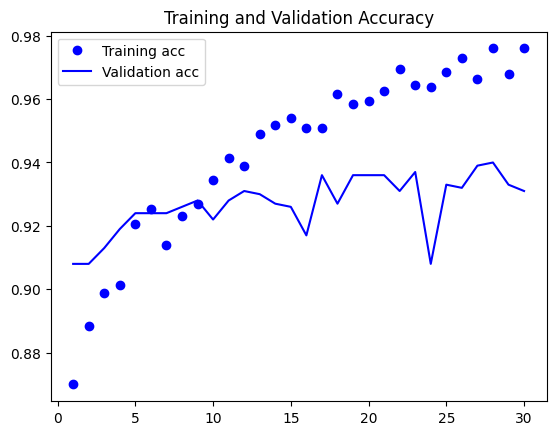

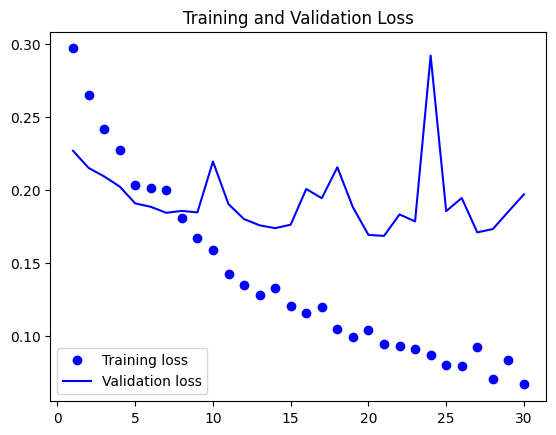

In [42]:
# Display the Loss and Accuracy Curves During Training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [43]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print('test acc: ',test_acc )

Found 1000 images belonging to 2 classes.


/tmp/ipykernel_95/531729787.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)


test acc:  0.9350000023841858
